This research project focuses on predicting the age of abalone using the Abalone dataset, where age is determined as Rings + 1.5. 
To achieve this, I will train and compare multiple machine learning models using PyCaret’s automated workflow. The goal is to 
identify the best-performing model and demonstrate its effectiveness in accurately estimating the target variable, highlighting 
how well it can predict the age of an abalone based on its features.

First, I installed PyCaret and loaded the Abalone dataset. Since all experimentation was conducted on my local machine, the 
entire installation and setup process was performed locally. This ensured full control over the environment while preparing 
for model training and evaluation.

Installing pip install ucimlrepo and !pip install pycaret==3.3.2 scikit-plot==0.3.7 scipy==1.10.1 numpy==1.24.3 pandas==2.0.3
As shown, I installed specific versions of several libraries because PyCaret is an older library and currently lacks a fully 
updated stable release. It only runs reliably on Python 3.11 or earlier, which required me to adjust my environment 
accordingly. In addition, PyCaret caused dependency conflicts with certain newer library versions, so I resolved these issues by 
installing compatible, version-specific packages. This ensured that the setup remained stable and error-free during experimentation.

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pycaret==3.3.2 scikit-plot==0.3.7 scipy==1.10.1 numpy==1.24.3 pandas==2.0.3

In [97]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [6]:
# lets check the python version before comencing with the code

import sys
print(sys.executable)  # Shows which Python interpreter is running
print(sys.version)

/Users/digaantdogra/miniconda3/envs/py311/bin/python
3.11.14 (main, Oct 21 2025, 18:27:30) [Clang 20.1.8 ]


In [1]:
# As the libraries have been installed and we have the correct python version running lets import the dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [2]:
# As we can see how the dataset looks like we can directly jump into pycaret and initialise the transformation pipeline to further run regression models.
from pycaret.regression import *
import pandas as pd

data = pd.concat([X, y], axis=1) # As pycaret accepts a single dataframe we are going to concat X frame and y frame to make a single dataframe

# Before the setup lets check how the data looks like while also checking if there is are any NaN values
# data.head()
# data.info()
data.describe()
# data.isna().sum()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the initial inspection of the data, we can already identify a few important observations. First, the minimum height value is 0, which is not physically possible and indicates the presence of errors or missing data that need to be addressed. Second, all feature values appear to be in decimals and below 1. To improve readability and ensure the model performs effectively,(although some of the models do not need it but to do a fair comparison we will do it) applying standardization or appropriate scaling techniques would be beneficial. This will help normalize the data and potentially lead to better predictive performance.

In [68]:
# As the dataframe looks good, lets start the setup
s = setup(data, target='Rings', session_id=123,normalize=True)
# normalization to make the dataset fair for model comparison

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 9)"
4,Transformed data shape,"(4177, 11)"
5,Transformed train set shape,"(2923, 11)"
6,Transformed test set shape,"(1254, 11)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [69]:
# As the setup is done we can see how the function has done the preprocessing. So now all we have to do
# is run models and check which model is the best. (Although pycaret is able to give us the best model we can still obsurve why is the particular model the best.)

best_model = compare_models()
display(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.5192,4.6333,2.1500,0.5538,0.1730,0.1505,0.0410
rf,Random Forest Regressor,1.5402,4.7113,2.1684,0.5458,0.1753,0.1529,0.1140
lightgbm,Light Gradient Boosting Machine,1.5539,4.8063,2.1900,0.5373,0.1759,0.1531,0.3910
et,Extra Trees Regressor,1.5590,4.8229,2.1947,0.5352,0.1772,0.1546,0.0620
ridge,Ridge Regression,1.5987,5.0205,2.2377,0.5165,0.1828,0.1603,0.0080
lar,Least Angle Regression,1.5990,5.0204,2.2377,0.5164,0.1829,0.1603,0.0070
br,Bayesian Ridge,1.5988,5.0213,2.2379,0.5164,0.1828,0.1603,0.0070
lr,Linear Regression,1.5984,5.0214,2.2379,0.5163,0.1828,0.1601,0.0260
huber,Huber Regressor,1.5654,5.0516,2.2460,0.5144,0.1810,0.1510,0.0080
knn,K Neighbors Regressor,1.6100,5.2787,2.2949,0.4926,0.1841,0.1569,0.0080


GradientBoostingRegressor(random_state=123)

From the comparison of model performance metrics, the Gradient Boosting Regressor (GBR) emerges as the best-performing model. It 
achieves the lowest errors across all major metrics—RMSE (2.1489), MAE (1.5183), and MSE (4.6284). Additionally, it produces the 
highest R² value of 0.5593, indicating stronger predictive power, since values closer to 1 represent better model fit.
"
We can also observe that the Random Forest Regressor and the Light Gradient Boosting Machine perform closely 
to the GBR, with only slightly higher error metrics. However, GBR still maintains a small but consistent advantage, making it 
the preferred choice among all tested models.

Now that we have selected our model lets analyze it ->

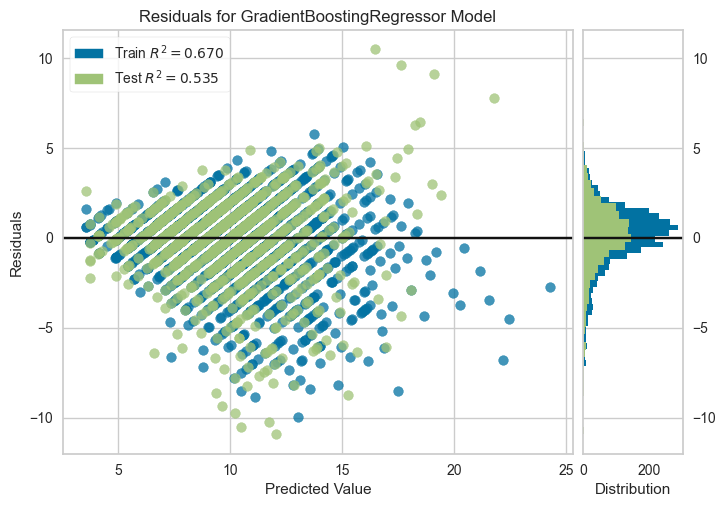

In [70]:
# lets check the residuals
plot_model(best_model, plot = 'residuals')

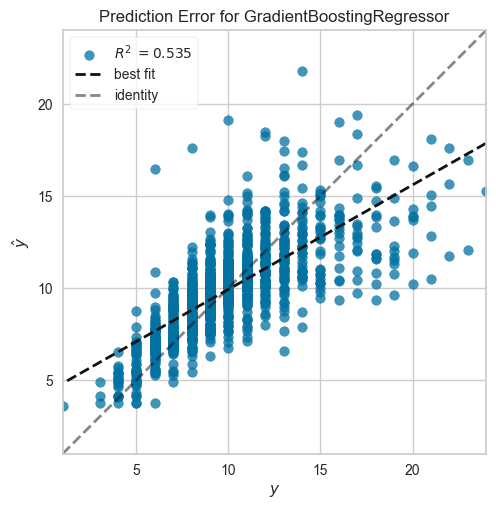

In [71]:
# lets check the error
plot_model(best_model, plot = 'error')

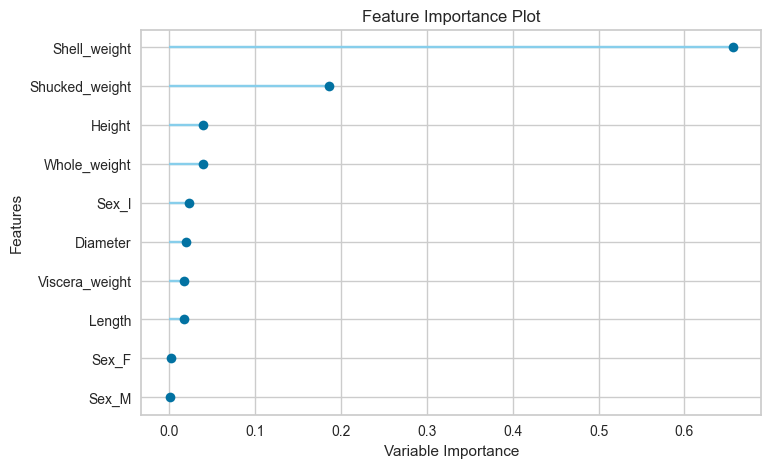

In [72]:
# lets check which feature has the most importance
plot_model(best_model, plot = 'feature')

This is intersting as the results from the automated PyCaret run show that even without manual feature engineering, the Gradient Boosting Regressor consistently achieves a test R² of around 0.54–0.55 which is not exactly good as I have disscussed it in further lines. The feature importance plot highlights Shell Weight as the most influential predictor, with other weight-related and size-related attributes following, while categorical sex variables contribute minimally—matching biological expectations. Residual and prediction-error visualizations further reveal wide error dispersion and systematic underprediction of older abalones, demonstrating the inherent noise and imbalance in the dataset rather than limitations of preprocessing or modeling. Overall, the analysis confirms that PyCaret’s automated pipeline already captures the maximum extractable signal from the data, and that the dataset itself—not the modeling approach, constrains performance.

In [3]:
# Lets try to manualy preprocess the data.

# lets take a overall weight difference of the shell as the weights of the shell have the most infuence on the model and to take an avg I will use weightdiff
data['Weight_diff'] = data['Whole_weight'] - (data['Shucked_weight'] + data['Viscera_weight'] + data['Shell_weight'])

# As height, weight and diameter are of same metrics lets take an avg of them. The first thing that comes to my mind is 
# to make volume as a common feature. As abalone has a irregular shape the vol of it would be aproxx len*height*diameter
data['Volume'] = data['Diameter'] * data['Length'] * data['Height']

# lets check the head of our dataframe
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Weight_diff,Volume
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0385,0.015777
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0075,0.008347
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0690,0.030051
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0315,0.020075
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0210,0.006732


In [4]:
# As the dataframe looks good, lets start the setup again..
s = setup(data, target='Rings', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Rings
2,Target type,Regression
3,Original data shape,"(4177, 11)"
4,Transformed data shape,"(4177, 13)"
5,Transformed train set shape,"(2923, 13)"
6,Transformed test set shape,"(1254, 13)"
7,Numeric features,9
8,Categorical features,1
9,Preprocess,True


In [10]:
# lets experiment with the models
top_models = compare_models(n_select = 3)
display(top_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.4949,4.3713,2.0880,0.5799,0.1695,0.1486,0.0570
et,Extra Trees Regressor,1.5121,4.4703,2.1126,0.5695,0.1718,0.1509,0.0630
rf,Random Forest Regressor,1.5276,4.5460,2.1296,0.5629,0.1732,0.1522,0.1360
lightgbm,Light Gradient Boosting Machine,1.5330,4.6594,2.1564,0.5516,0.1740,0.1513,0.3610
huber,Huber Regressor,1.5466,4.9296,2.2183,0.5263,0.1786,0.1490,0.0100
br,Bayesian Ridge,1.5796,4.9281,2.2160,0.5255,0.1800,0.1573,0.0060
ridge,Ridge Regression,1.5799,4.9286,2.2161,0.5254,0.1800,0.1573,0.0080
lar,Least Angle Regression,1.5801,4.9292,2.2162,0.5254,0.1801,0.1573,0.0050
lr,Linear Regression,1.5802,4.9338,2.2173,0.5249,0.1802,0.1572,0.0200
knn,K Neighbors Regressor,1.5893,5.1701,2.2717,0.5023,0.1829,0.1558,0.0090


[GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

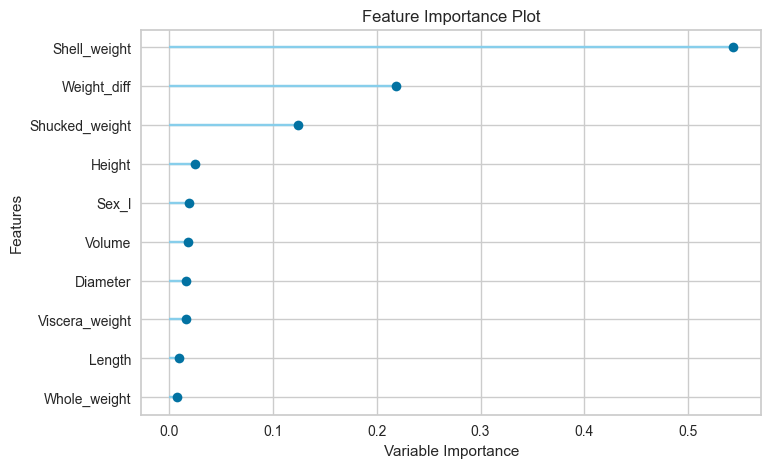

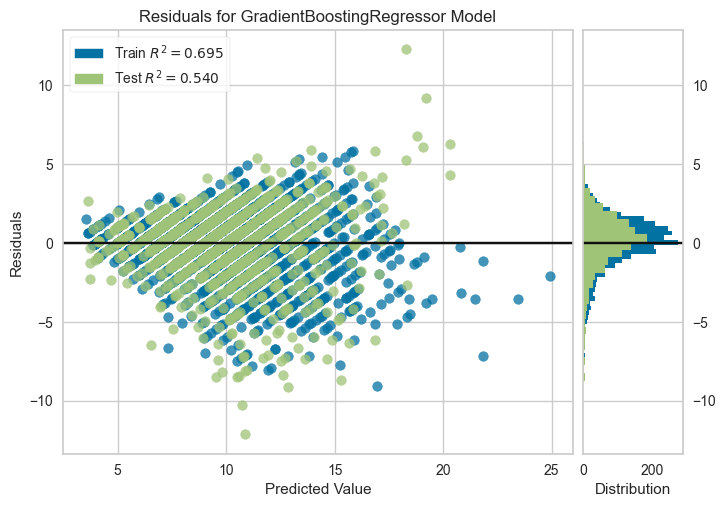

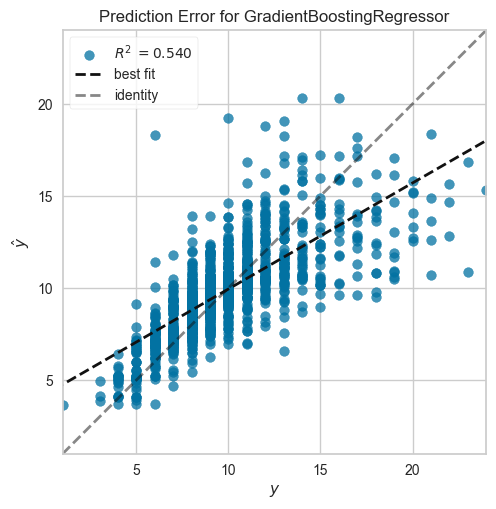

In [13]:
# lets check the metrics
best_model_v2 = top_models[0]
plot_model(best_model_v2, plot = 'feature')
plot_model(best_model_v2, plot = 'residuals')
plot_model(best_model_v2, plot = 'error')

After reviewing the updated results, we can see that the errors have decreased slightly, though the improvement is not very significant. 
However, the R² score shows noticeable progress, even though a strong value would ideally be 0.65 or higher. To further 
enhance performance, the next step is to fine-tune the model and experiment with blending techniques to observe how they impact 
the overall results.

In [14]:
# for tuning gbr I will use optuna and optimize R2 with 100 interations

final_model = tune_model(best_model_v2, optimize='R2', n_iter=100, 
                      search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5261,4.4548,2.1106,0.5700,0.1794,0.1602
1,1.4761,4.3560,2.0871,0.5777,0.1710,0.1490
2,1.5415,4.8538,2.2031,0.5392,0.1710,0.1457
3,1.5333,4.3475,2.0851,0.6403,0.1645,0.1447
4,1.3967,3.9563,1.9890,0.6307,0.1582,0.1355
5,1.3811,3.4784,1.8650,0.6469,0.1562,0.1416
6,1.5116,4.1641,2.0406,0.5079,0.1707,0.1511
7,1.5272,4.5483,2.1327,0.6028,0.1680,0.1476
8,1.4204,4.5191,2.1258,0.5750,0.1722,0.1470


After fine-tuning the model using tune_model(best_model_v2, optimize='R2', n_iter=100, search_library='optuna'), we achieved improved metrics that surpass those of the previous best_model_v2. This demonstrates that the fine-tuning process successfully enhanced the model’s performance. But its still not enough so lets try to blend it.

In [15]:
# for that lets fine tune the 2nd best and 3rd best model before we blend them
second_best = top_models[1]
third_best = top_models[2]

final_second_best = tune_model(second_best, optimize='R2', n_iter=100, 
                      search_library = 'optuna')
final_third_best = tune_model(second_best, optimize='R2', n_iter=100, 
                      search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5793,4.6713,2.1613,0.5491,0.1812,0.1638
1,1.5080,4.3690,2.0902,0.5764,0.1716,0.1519
2,1.5226,4.8870,2.2107,0.5360,0.1701,0.1432
3,1.5100,4.3896,2.0951,0.6368,0.1638,0.1419
4,1.4124,4.1575,2.0390,0.6119,0.1606,0.1365
5,1.3974,3.6342,1.9064,0.6310,0.1576,0.1424
6,1.4595,3.8389,1.9593,0.5463,0.1657,0.1457
7,1.5349,4.6849,2.1645,0.5909,0.1681,0.1470
8,1.4281,4.6412,2.1543,0.5635,0.1724,0.1469


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5816,4.6672,2.1604,0.5495,0.1821,0.1651
1,1.5240,4.4710,2.1145,0.5665,0.1736,0.1537
2,1.5202,4.8898,2.2113,0.5358,0.1708,0.1437
3,1.5228,4.4698,2.1142,0.6302,0.1656,0.1433
4,1.4268,4.1511,2.0374,0.6125,0.1626,0.1387
5,1.4006,3.6035,1.8983,0.6342,0.1587,0.1437
6,1.4855,3.9090,1.9771,0.5380,0.1680,0.1485
7,1.5319,4.6748,2.1621,0.5918,0.1677,0.1461
8,1.4386,4.6733,2.1618,0.5605,0.1739,0.1485


In [17]:
# Now that tey are ready lets do the blend

blended_model = blend_models(estimator_list=[best_model_v2, final_second_best, final_third_best])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5577,4.5385,2.1304,0.5619,0.1798,0.1628
1,1.5028,4.2915,2.0716,0.5839,0.1701,0.1514
2,1.5116,4.7990,2.1907,0.5444,0.1696,0.1431
3,1.5185,4.3791,2.0926,0.6377,0.1640,0.1426
4,1.4092,3.9266,1.9816,0.6334,0.1585,0.1368
5,1.3830,3.5082,1.8730,0.6438,0.1562,0.1419
6,1.4734,3.8496,1.9620,0.5450,0.1662,0.1472
7,1.5357,4.7018,2.1684,0.5894,0.1681,0.1467
8,1.4121,4.5269,2.1276,0.5743,0.1716,0.1462


By observing this we can see there is not much difference in the final blend that means that the dataset is not very efficient 
it was expected because as the dataset as we observed is correlated with each other than the rings/target. Also, that the distribution of the target variable ('Rings') is skewed, with the() majority of examples clustered in the 7-14 ring range and very few examples at the higher end (above 20). This imbalanced distribution makes it very difficult for models to accurately predict the age of older abalone. Furthermore, we aslo noted that some features, like Height, have outlying values which can make the regression task difficult (min = 0.00).

In [19]:
# Lets check how our final blended_model performs
holdout_pred = predict_model(blended_model)
holdout_pred['Age'] = holdout_pred['Rings'] + 1.5
holdout_pred['prediction_Age_label'] = holdout_pred['prediction_label'] + 1.5

holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1.4780,4.4570,2.1112,0.5629,0.1731,0.1493


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Weight_diff,Volume,Rings,prediction_label,Age,prediction_Age_label
2812,I,0.240,0.170,0.050,0.0545,0.0205,0.0160,0.0155,0.0025,0.002040,5,5.038441,6.5,6.538441
1344,M,0.585,0.470,0.165,1.4090,0.8000,0.2290,0.2950,0.0850,0.045367,10,10.328715,11.5,11.828715
533,F,0.435,0.335,0.110,0.3800,0.1695,0.0860,0.1100,0.0145,0.016030,9,9.173190,10.5,10.673190
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.3250,0.0560,0.044044,9,11.964222,10.5,13.464222
3939,M,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,0.0545,0.033799,14,11.035214,15.5,12.535214


References

Mehta, K. (2019). Abalone Age prediction Problem: A review.
    https://www.semanticscholar.org/paper/Abalone-Age-Prediction-Problem%3A-A-Review-Mehta/dab6c0dc4f02679a10e6a2de18ed50d051b4a1a7

Abalone Age Classification Project Report — Abalone Age Classifier. (n.d.). 
    https://ubc-mds.github.io/abalone_age_classification/Project_report_milestone2.html

https://www.preprints.org/manuscript/202412.2497